# **Segmentación de Clientes**

## **Librerías y carga de dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Credit Card Customer Data.csv")

In [ ]:
data.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## **Análisis Preliminar**

In [ ]:
data.shape

(660, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


## **Seleccionando las variables correctas**

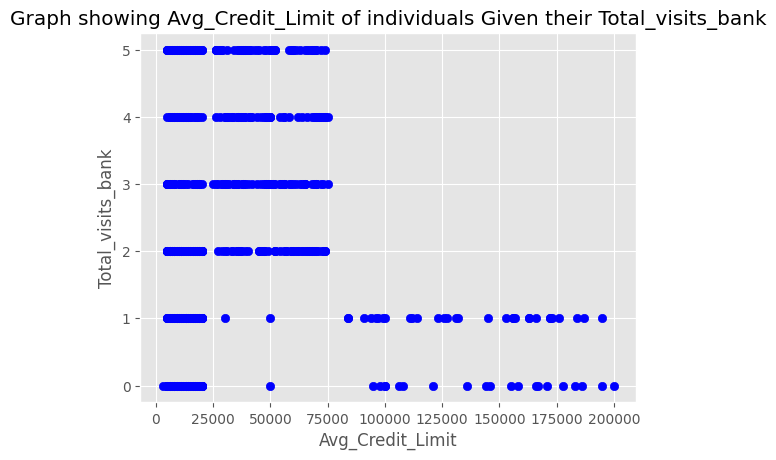

In [ ]:
plt.scatter(data["Avg_Credit_Limit"], data["Total_visits_bank"], color='b')
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_visits_bank")
plt.title("Graph showing Avg_Credit_Limit of individuals Given their Total_visits_bank")
plt.show()

## **Escalando los datos**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(data[["Avg_Credit_Limit"]])

data["Annual_income"] = scaler.transform(data[["Avg_Credit_Limit"]])

In [ ]:
scaler.fit(data[["Avg_Credit_Limit"]])

data["Annual_income"] = scaler.transform(data[["Avg_Credit_Limit"]])

In [ ]:
data.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Annual_income
0,1,87073,100000,2,1,1,0,0.492386
1,2,38414,50000,3,0,10,9,0.238579
2,3,17341,50000,7,1,3,4,0.238579
3,4,40496,30000,5,1,1,4,0.137056
4,5,47437,100000,6,0,12,3,0.492386


In [ ]:
new_data = data[["Avg_Credit_Limit", "Total_visits_bank"]]
new_data.head()

,Avg_Credit_Limit,Total_visits_bank
0,100000,1
1,50000,0
2,50000,1
3,30000,1
4,100000,0


## **K-means y el método del codo**

In [ ]:
k_range = list(range(1, 11))
sse = []

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data[["Avg_Credit_Limit", "Total_visits_bank"]])
    sse.append(km.inertia_)

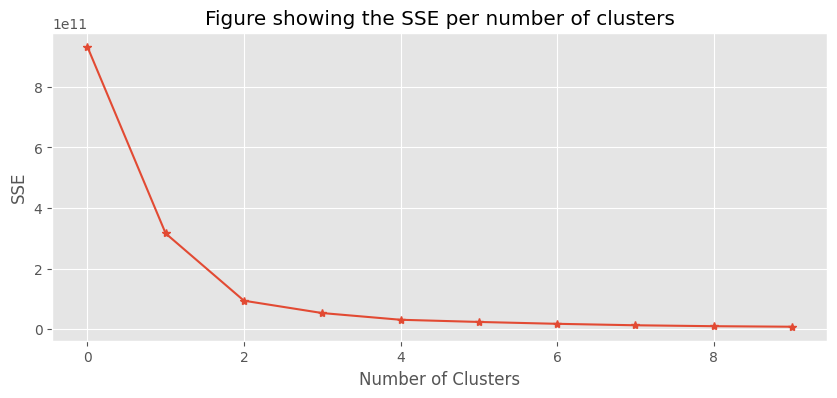

In [ ]:
plt.figure(figsize = (10, 4))
plt.plot(sse, marker = "*")
plt.title("Figure showing the SSE per number of clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## **Entrenando con el valor de K óptimo**

In [ ]:
km = KMeans(n_clusters = 4)

In [ ]:
y_predicted = km.fit_predict(new_data[["Avg_Credit_Limit", "Total_visits_bank"]])

In [ ]:
y_predicted

array([1, 3, 3, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
new_data["cluster"] = (y_predicted + 1)

In [ ]:
new_data.head()

,Avg_Credit_Limit,Total_visits_bank,cluster
0,100000,1,2
1,50000,0,4
2,50000,1,4
3,30000,1,4
4,100000,0,2


In [ ]:
new_data.cluster.unique()

array([2, 4, 1, 3], dtype=int32)

In [ ]:
print("The coordinates of cluster centroids: ")
km.cluster_centers_

The coordinates of cluster centroids: 


array([[1.23994975e+04, 2.11306533e+00],
       [7.28817204e+04, 2.82795699e+00],
       [1.60676471e+05, 5.88235294e-01],
       [4.18000000e+04, 3.42222222e+00]])

In [ ]:
df1 = new_data[new_data.cluster == 1]
df2 = new_data[new_data.cluster == 2]
df3 = new_data[new_data.cluster == 3]
df4 = new_data[new_data.cluster == 4]
df5 = new_data[new_data.cluster == 5]

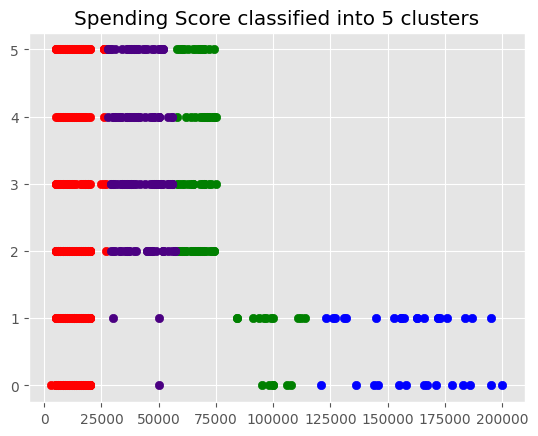

In [ ]:


plt.scatter(df1["Avg_Credit_Limit"], df1["Total_visits_bank"], color = "red")
plt.scatter(df2["Avg_Credit_Limit"], df2["Total_visits_bank"], color = "green")
plt.scatter(df3["Avg_Credit_Limit"], df3["Total_visits_bank"], color = "blue")
plt.scatter(df4["Avg_Credit_Limit"], df4["Total_visits_bank"], color = "indigo")
plt.scatter(df5["Avg_Credit_Limit"], df5["Total_visits_bank"], color = "brown")
plt.title("Spending Score classified into 5 clusters")
plt.show()

